In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
df_fair = sm.datasets.fair.load_pandas().data

In [4]:
df = df_fair
df = df.assign(affairs_yn=(df.affairs > 0).astype(float))
df_fair_2 = df

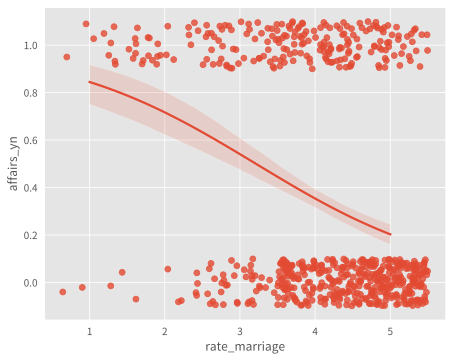

In [5]:
df = df_fair_2.sample(frac=0.1, random_state=20190429)
sns.regplot(data=df, x='rate_marriage', y='affairs_yn',
            logistic=True,
            x_jitter=1/2, y_jitter=0.2/2)

In [6]:
df = df_fair_2
(smf
 .logit('affairs_yn'
        '~ C(rate_marriage)'
        '+ C(rate_marriage):C(religious)', df)
 .fit()
 .summary())

Optimization terminated successfully.
         Current function value: 0.565654
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             affairs_yn   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6346
Method:                           MLE   Df Model:                           19
Date:                Sun, 26 Apr 2020   Pseudo R-squ.:                  0.1003
Time:                        16:01:15   Log-Likelihood:                -3601.0
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                4.598e-158
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.6931      0.500      1.386      0.166      -0.287       1.673
C(rate_marriage)[T.2.0]                       0.2231      0.581      0.384      0.701      -0.915       1.362
C(rate_marriage)[T.3.0]                      -0.2122      0.523     -0.405      0.685      -1.238       0.813
C(rate_marriage)[T.4.0]                      -1.2009      0.512     -2.345      0.019      -2.205      -0.197
C(rate_marriage)[T.5.0]                      -1.6664      0.512     -3.256      0.001      -2.669      -0.663
C(rate_marriage)[1.0]:C(religious)[T.2.0]     0.5596      0.641      0.873      0.383      -0.696       1.816
C(rate_marriage)[2.0]:C(religious)[T.2.0]    -0.1398      0.345     -0.405      0.686      -0.817       0.537
C(rate_marriage)[3.0]:C(religious)[T.2.0]    -0.2657      0.184     -1.443      0.149      -0.626       0.095
C(rate_marriage)[4.0]:C(religious)[T.2.0]    -0.0294      0.132     -0.222      0.824      -0.288       0.230
C(rate_marriage)[5.0]:C(religious)[T.2.0]    -0.4791      0.140     -3.427      0.001      -0.753      -0.205
C(rate_marriage)[1.0]:C(religious)[T.3.0]     0.4769      0.629      0.758      0.448      -0.756       1.710
C(rate_marriage)[2.0]:C(religious)[T.3.0]    -0.5656      0.349     -1.622      0.105      -1.249       0.118
C(rate_marriage)[3.0]:C(religious)[T.3.0]    -0.3412      0.188     -1.811      0.070      -0.710       0.028
C(rate_marriage)[4.0]:C(religious)[T.3.0]    -0.4342      0.134     -3.239      0.001      -0.697      -0.171
C(rate_marriage)[5.0]:C(religious)[T.3.0]    -0.6133      0.137     -4.487      0.000      -0.881      -0.345
C(rate_marriage)[1.0]:C(religious)[T.4.0]     0.2231      0.975      0.229      0.819      -1.687       2.133
C(rate_marriage)[2.0]:C(religious)[T.4.0]    -1.3218      0.504     -2.622      0.009      -2.310      -0.334
C(rate_marriage)[3.0]:C(religious)[T.4.0]    -0.7105      0.286     -2.486      0.013      -1.271      -0.150
C(rate_marriage)[4.0]:C(religious)[T.4.0]    -0.7732      0.210     -3.675      0.000      -1.186      -0.361
C(rate_marriage)[5.0]:C(religious)[T.4.0]    -1.3503      0.212     -6.355      0.000      -1.767      -0.934
=============================================================================================================
"""

In [7]:
res = (smf
       .logit('affairs_yn'
              '~ C(rate_marriage)'
              '+ C(rate_marriage):C(religious)', df)
       .fit())
res.predict(dict(rate_marriage=[1, 5, 5], religious=[1, 1, 4]))

Optimization terminated successfully.
         Current function value: 0.565654
         Iterations 6


0    0.666667
1    0.274232
2    0.089189
dtype: float64